In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical,normalize
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [3]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for img in images:
        try:
            image = Image.open(path + '//'+ img)
            image = image.resize((32,32))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Ошибка")

In [4]:
data = np.array(data)
labels = np.array(labels)

In [5]:
print(data.shape, labels.shape)

(39209, 32, 32, 3) (39209,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, 
                                                    random_state=42)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [8]:

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [18]:
# X_train = normalize(X_train, axis=1)
# X_test = normalize(X_test, axis=1)

In [9]:
# #хреновая модель!
# model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
# model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
# model.add(BatchNormalization(axis=-1))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization(axis=-1))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(128))
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(128))
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(classes))
# model.add(Activation("softmax"))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 2801s 3s/step - loss: 2.9203 - accuracy: 0.2448 - val_loss: 3.3945 - val_accuracy: 0.1715
Epoch 2/15
981/981 [==============================] - 2738s 3s/step - loss: 2.0122 - accuracy: 0.4058 - val_loss: 1.7711 - val_accuracy: 0.4667
Epoch 3/15
981/981 [==============================] - 2561s 3s/step - loss: 1.8541 - accuracy: 0.4365 - val_loss: 1.7560 - val_accuracy: 0.4443
Epoch 4/15
981/981 [==============================] - 2558s 3s/step - loss: 1.6730 - accuracy: 0.4768 - val_loss: 1.4461 - val_accuracy: 0.5463
Epoch 5/15
981/981 [==============================] - 2559s 3s/step - loss: 1.5732 - accuracy: 0.5035 - val_loss: 1.1694 - val_accuracy: 0.6145
Epoch 6/15
981/981 [==============================] - 2557s 3s/step - loss: 1.5046 - accuracy: 0.5226 - val_loss: 1.1450 - val_accuracy: 0.6274
Epoch 7/15
981/981 [==============================] - 2565s 3s/step - loss: 1.4695 - accuracy: 0.5342 - val_loss: 1.0685 - val_accuracy:

In [13]:
model.save("my_model2.h5")

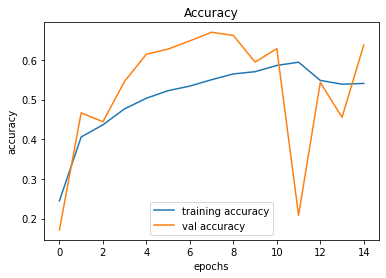

In [14]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

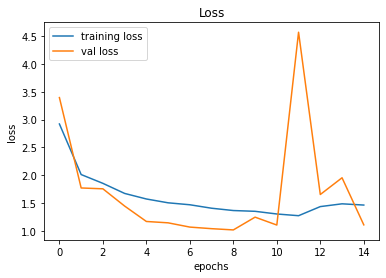

In [15]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#0.81точности
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

In [17]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict_classes(X_test)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))
model.save('traffic_classifier.h5')

ValueError: in user code:

    /home/yalokinz/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /home/yalokinz/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/yalokinz/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/yalokinz/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/yalokinz/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /home/yalokinz/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /home/yalokinz/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:277 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/yalokinz/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    /home/yalokinz/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    /home/yalokinz/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /home/yalokinz/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 1024 but received input with shape [None, 576]
